# Distribution Plots
## Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:
distplot: 
jointplot:
pairplot:
rugplot:
kdeplot;

In [5]:
import seaborn as sns

In [5]:
tips = sns.load_dataset('tips')

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

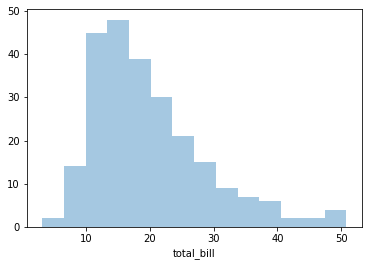

In [11]:
sns.distplot(tips['total_bill'],kde=False)

## jointplot
“scatter” 
“reg” 
“resid” 
“kde” 
“hex

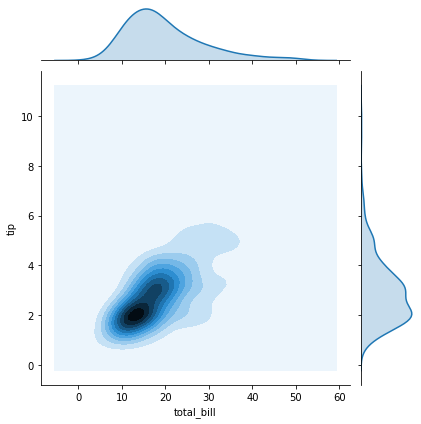

In [18]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')    # kind=scatter or reg or kde etc

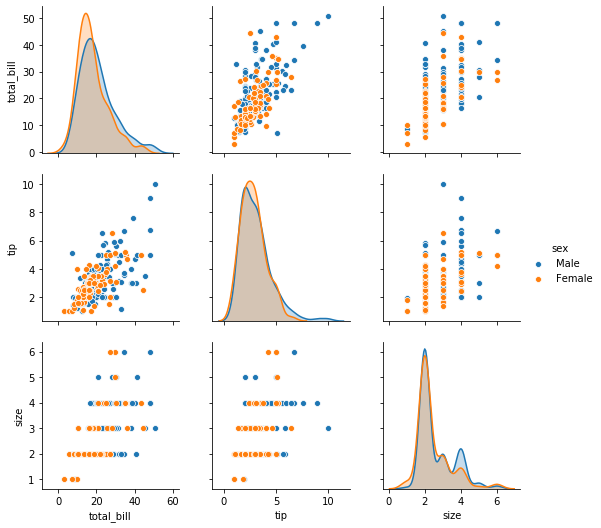

In [22]:
sns.pairplot(tips,hue='sex')   #pass 3rd argument as palette= 'coolwarm',your jupyternotebook is too smart

## rugplot

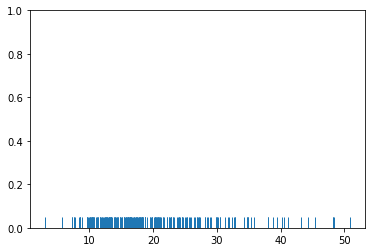

In [24]:
sns.rugplot(tips['total_bill'])

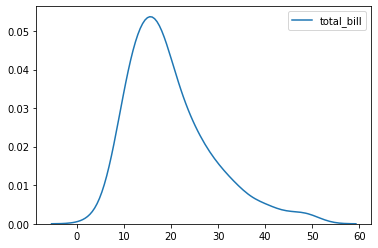

In [25]:
sns.kdeplot(tips['total_bill'])    # kdeplot is used get a graphical representation for only kde

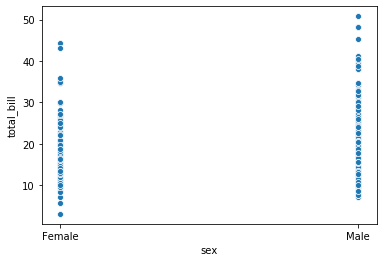

In [135]:
sns.scatterplot(data=tips, x='sex', y='total_bill')  #i missed the scatter plot topic

## CategoricalPlots
factorplot;
boxplot;
violinplot;
stripplot;
swarmplot;
barplot;
countplot;

it is mainly used to compare one category and one numeric most of the time

In [1]:
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


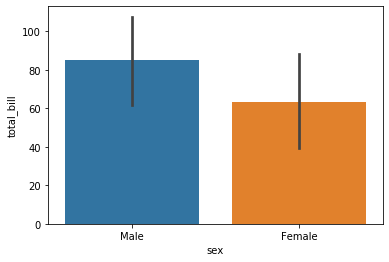

In [6]:
import numpy as np
sns.barplot(y='total_bill', x='sex', data=tips, estimator= np.std) # not passing estimator, y axis will be average by default

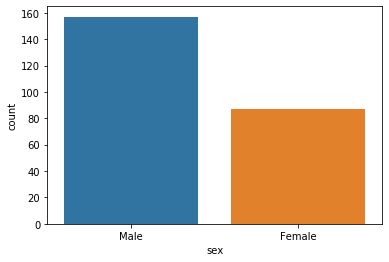

In [8]:
sns.countplot(x='sex', data=tips)   # only counts a perticular parameter

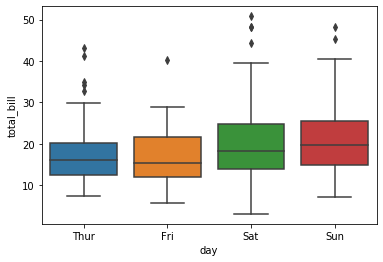

In [20]:
sns.boxplot(x='day', y='total_bill', data=tips)

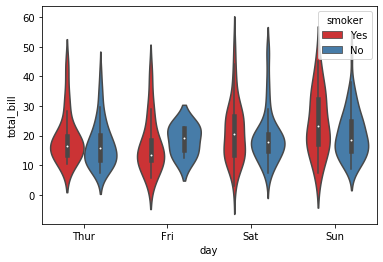

In [28]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', palette='Set1')



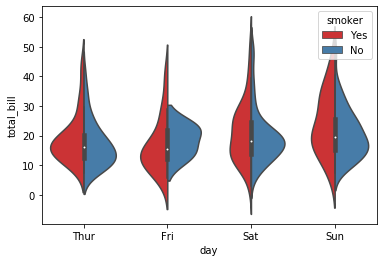

In [30]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='smoker', palette='Set1', split=True)

In [31]:
# better don't use stripplot for lots of data

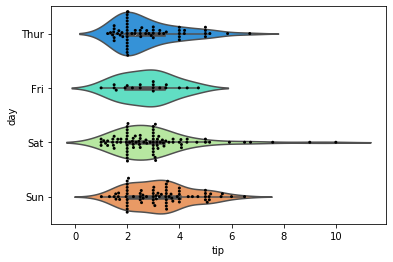

In [32]:
#combaining two method
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

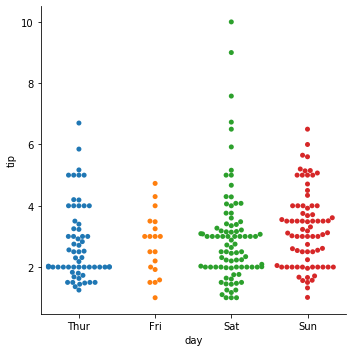

In [44]:
sns.factorplot(x='day', y='tip', data=tips, kind='violin' and 'swarm') #note that boolean 

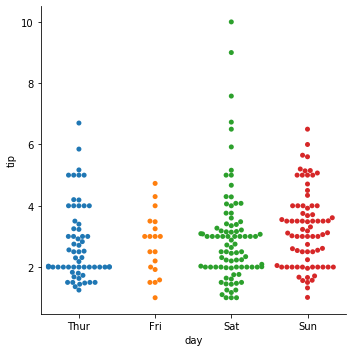

In [42]:
sns.factorplot(x='day', y='tip', data=tips, kind='swarm')

## MatrixPlot
heatmap and clustermap

heatmap can only be used in between two variables, not applicable in between index and variable or any other combination

In [50]:
import seaborn as sns

In [109]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
tc = tips.corr()

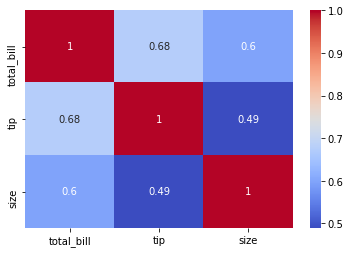

In [64]:
sns.heatmap(data=tc, cmap='coolwarm', annot=True)

In [86]:
tp = tips.pivot_table('tip', 'sex', 'total_bill')

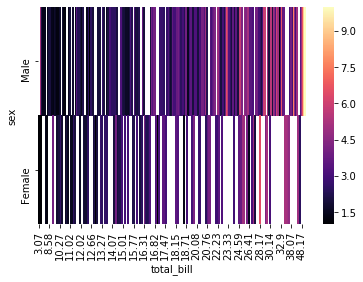

In [87]:
sns.heatmap(data=tp, cmap= 'magma')

In [94]:
tips.max(axis=1).head()

SyntaxError: positional argument follows keyword argument (<ipython-input-94-4edefded4f29>, line 1)

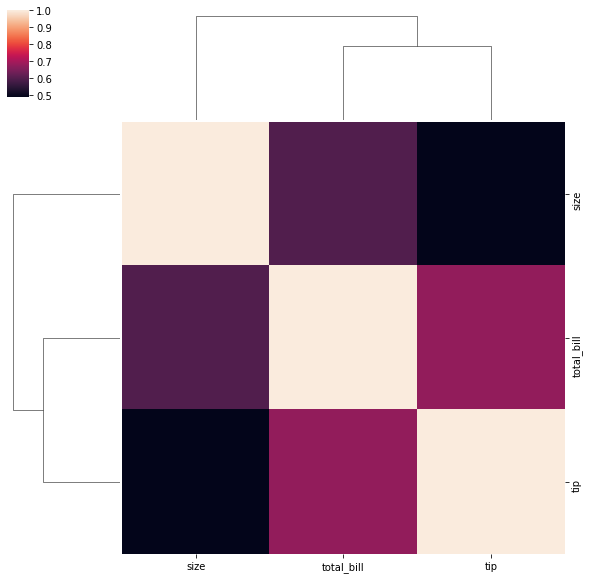

In [96]:
sns.clustermap(data=tc)

In [99]:
flights = sns.load_dataset('flights')

In [104]:
fl = flights.head()

In [107]:
fl

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [111]:
fl1 = flights.pivot_table(values='passengers', index='month', columns='year')

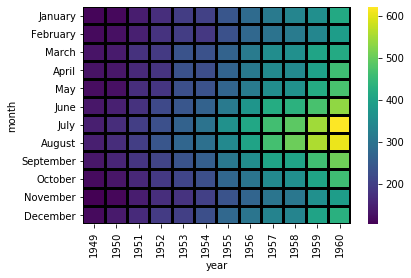

In [123]:
sns.heatmap(data=fl1, cmap='viridis', linecolor='black', linewidths= 2)  #cmap= inferno, plasma, cividis, viridis etc google

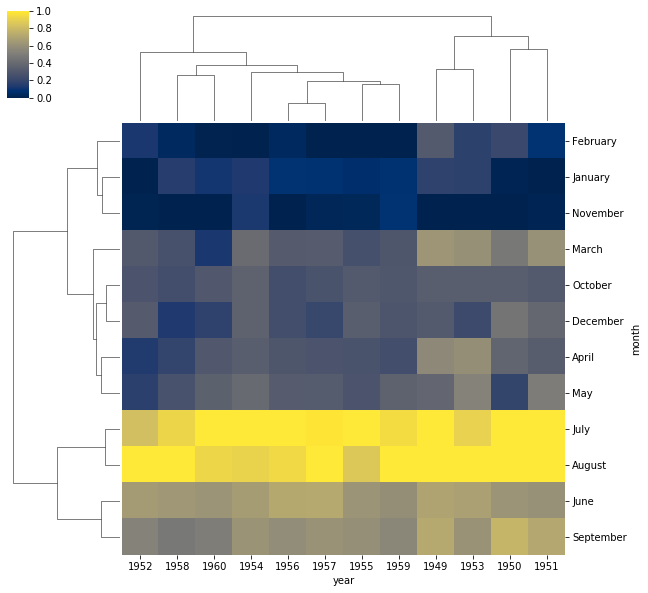

In [130]:
# More options to get the information a little clearer like normalization
sns.clustermap(data=fl1, cmap='cividis', standard_scale=1)

## Grids
main problem with grid is you are not getting grids at all, still good for good control on your data plot

In [136]:
import matplotlib.pyplot as plt

In [137]:
iris = sns.load_dataset('iris')

In [138]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


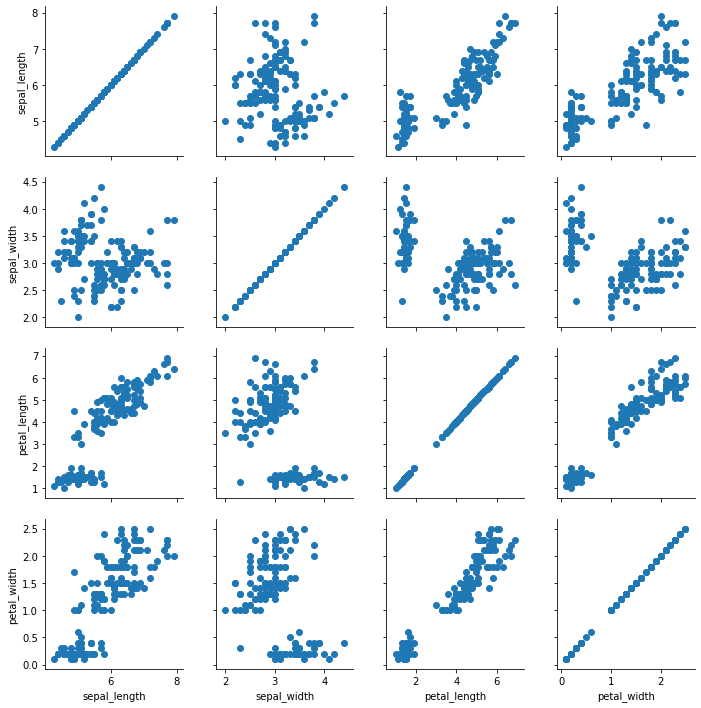

In [145]:
g = sns.PairGrid(data=iris)

g.map(plt.scatter)

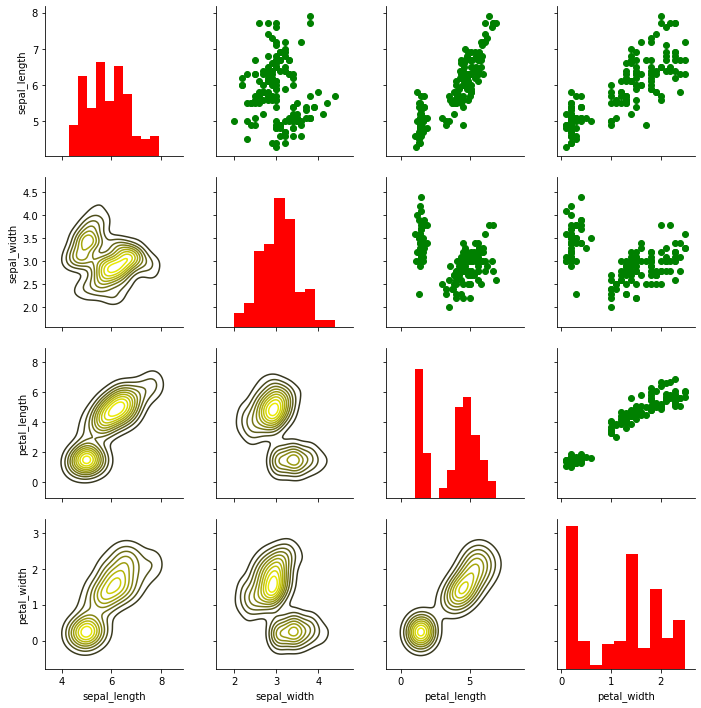

In [150]:
g = sns.PairGrid(data=iris)
g.map_diag(plt.hist, color='r')
g.map_upper(plt.scatter, color='g')
g.map_lower(sns.kdeplot, color='yellow')

## Facet Grid

In [151]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [161]:
%matplotlib inline

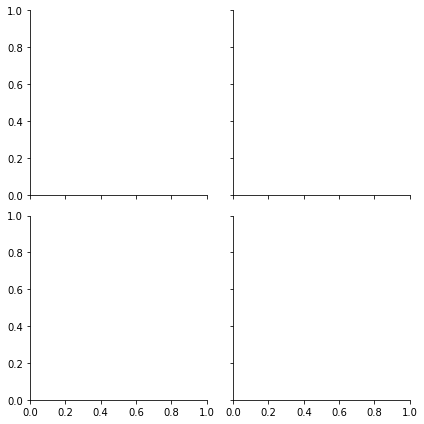

In [162]:
sns.FacetGrid(data=tips, row='smoker', col='time')     #look at the difference between the two lines of code
map(plt.hist, 'total_bill')

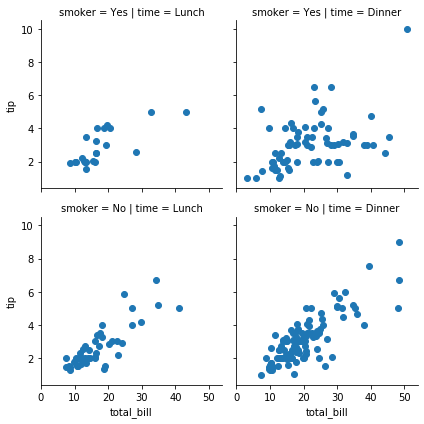

In [171]:
g = sns.FacetGrid(tips, col="time",  row="smoker")   #look at the difference between the two lines of code
g = g.map(plt.scatter, "total_bill", 'tip')

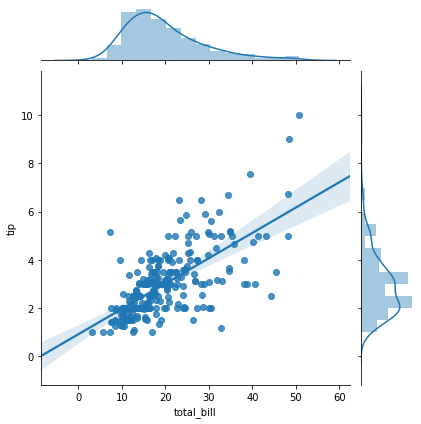

In [173]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

## RegressionPlot
   furthur it will be done in the machine learning section

## lmplot

In [176]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


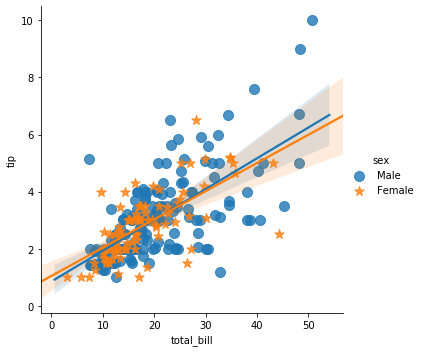

In [180]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex', markers=['o','*'], scatter_kws={'s':100})

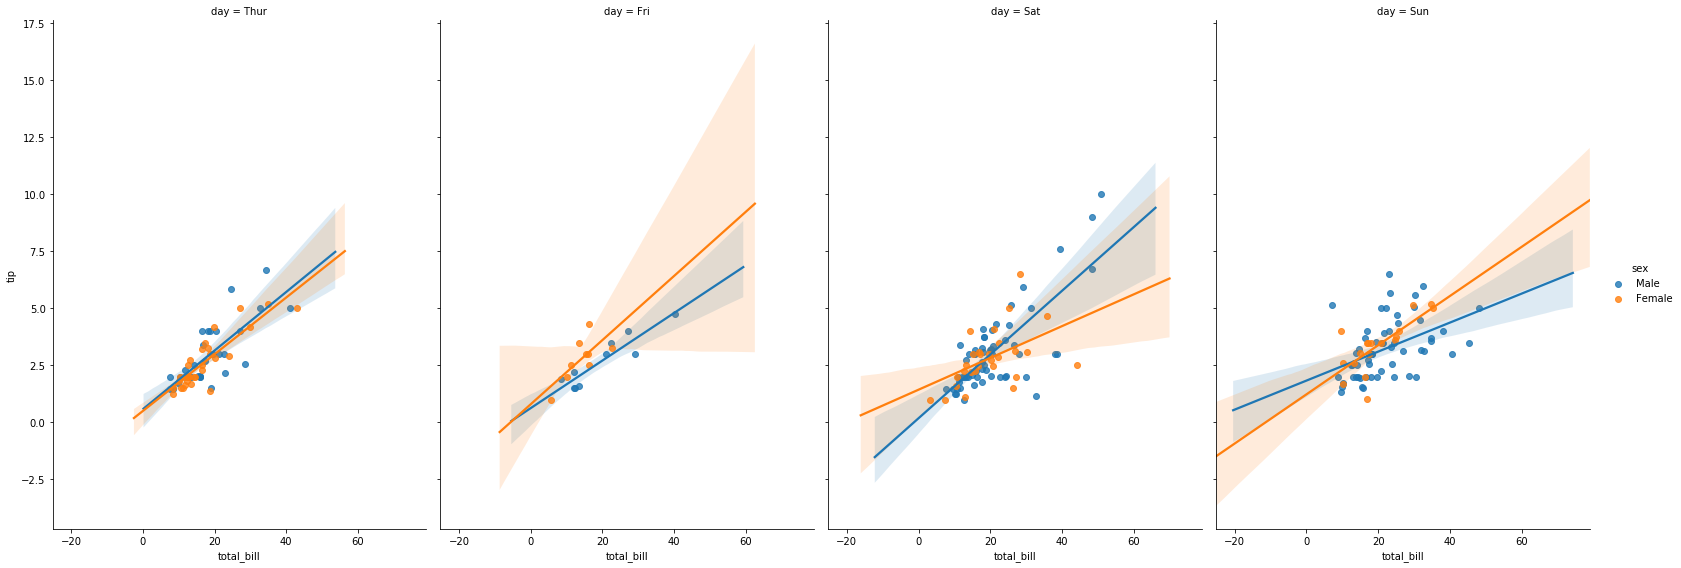

In [191]:
sns.lmplot(data=tips, x='total_bill', y='tip', col='day', hue='sex',
          aspect=0.7, size=8)

## Style and color

In [194]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


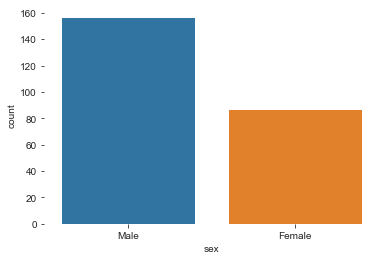

In [201]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)
sns.despine(left=True, bottom=True)

## size and aspect

In [202]:
import matplotlib.pyplot as plt

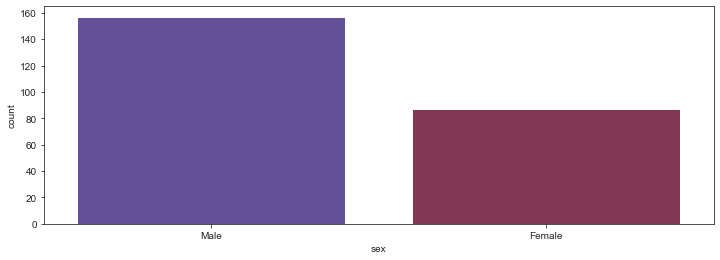

In [208]:
plt.figure(figsize=[12,4])
sns.countplot(x='sex', data=tips, palette='twilight')   #google 'matplotlib colormap' for many other option

## scale and context

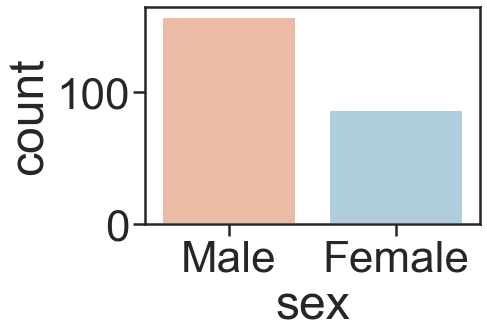

In [212]:
sns.set_context('poster', font_scale=2)
sns.countplot(x='sex', data=tips, palette='RdBu')


## Excercises Solution

In [6]:
titanic = sns.load_dataset('titanic')	

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [216]:
import numpy as np

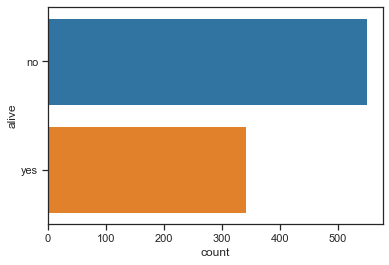

In [241]:
sns.countplot(y='alive', data=titanic)
sns.set_context('notebook', font_scale=0.5)

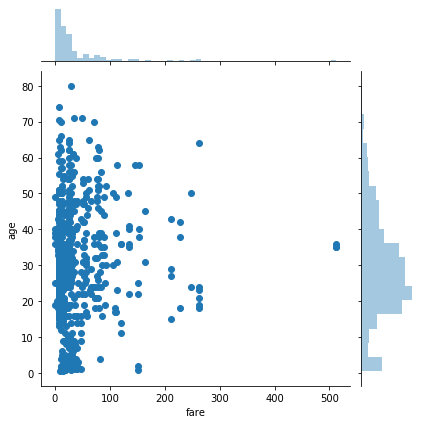

In [12]:
sns.jointplot(x='fare', y='age', data=titanic)

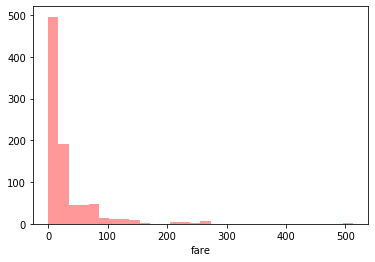

In [21]:
sns.distplot(titanic['fare'], bins=30, kde=False, color='red')

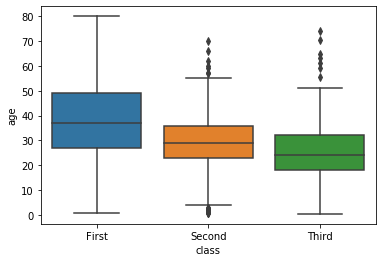

In [22]:
sns.boxplot(x='class', y='age', data=titanic)

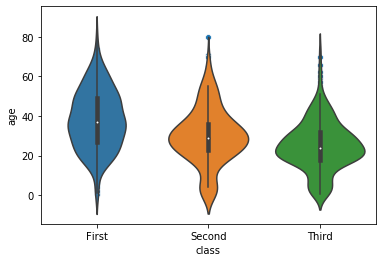

In [28]:
sns.scatterplot('class','age',data=titanic)
sns.violinplot('class','age',data=titanic)

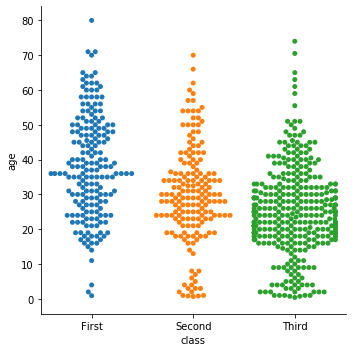

In [31]:
sns.catplot('class','age',data=titanic, kind='swarm')   #factorplot has been renamed as catplot
#you can directly use swarmplot

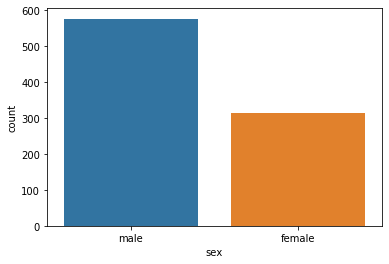

In [32]:
sns.countplot(x='sex',data=titanic)

In [37]:
tc = titanic.corr()

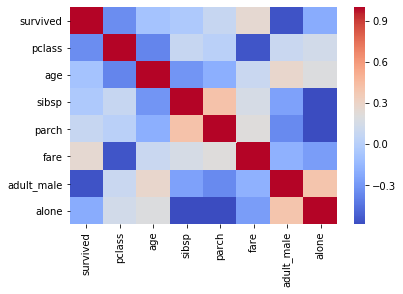

In [38]:
sns.heatmap(data=tc, cmap='coolwarm')

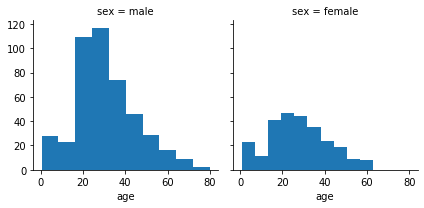

In [44]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(data=titanic, col='sex')  
g = g.map(plt.hist, 'age')

In [2]:
import seaborn as sns

In [6]:
tc = sns.load_dataset('titanic')

In [7]:
tc.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
import bamboolib as bam

In [9]:
tc

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


## Job Done